In [95]:
import os
import nibabel as nib
import skimage.io as io
import matplotlib.pyplot as plt # plt is used for showing the image
import matplotlib.image as mpimg # mpimg is used for read in the image
import numpy as np
from PIL import Image
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.imwarp import DiffeomorphicMap
from dipy.align.metrics import CCMetric
import os.path
from dipy.viz import regtools

In [96]:
in1='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/anat/preproc/t1w_brain_nores.nii.gz'
ref1='/usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'
aff='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/tmp/reg_m/xfm_t1w2mni_init.mat'
#iout='/Users/zhenhu/Desktop/outputs/t1w_aligned_mni.nii.gz'
iout='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/anat/preproc/t1w_aligned_mni.nii.gz'
#cout='/Users/zhenhu/Desktop/outputs/warp_t12mni.nii.gz'
cout='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/tmp/reg_a/warp_t12mni.nii.gz'
warpres='8,8,8'
refmask='/Users/zhenhu/Downloads/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz'
applyrefmask='1'
config='/usr/local/fsl/etc/flirtsch/T1_2_MNI152_2mm.cnf'

In [97]:
warp1=cout
ref2='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/anat/preproc/t1w_brain_nores.nii.gz'
#out1='/Users/zhenhu/Desktop/outputs/mni2t1w_warp.nii.gz'
out1='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/tmp/reg_a/mni2t1w_warp.nii.gz'

In [102]:
ref3=ref2
in2='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/tmp/reg_a/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas_t1w_mni.nii.gz'
warp2=out1
#out2='/Users/zhenhu/Desktop/outputs/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas_skull.nii.gz'
out2='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/tmp/reg_a/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas_skull.nii.gz'
interp='nn'
superlevel='a'

In [103]:
#running the fnirt part
cmd="fnirt --ref=" + ref1 + " --in=" + in1 + " --aff" + aff + " --iout" + iout + " --cout" + cout + " --warpres" + warpres + " --refmask" + refmask + " --applyrefmask" + applyrefmask + " --config" + config
os.system(cmd)

256

In [104]:
#running the invwarp part
cmd = "invwarp --warp=" + warp1 + " --out=" + out1 + " --ref=" + ref2
os.system(cmd)

0

In [105]:
#running the applywarp part
cmd = ("applywarp --ref=" + ref3 + " --in=" + in2 + " --out=" + out2 + " --warp=" + warp2 + " --interp" + interp + " --superlevel" + superlevel)
os.system(cmd)

256

In [106]:
print("The below is fnirit part:")
print('~~'*20)

The below is fnirit part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


This is the input of fnirit: --------------------
This is the shape of the in1 image: (91, 109, 91)
This is the shape of ref3 data: (91, 109, 91)
This is the shape of the ref3 image's affine matrix: (4, 4)


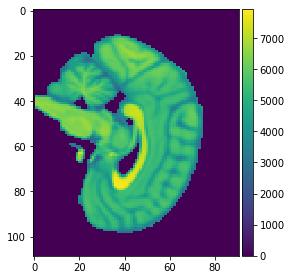

In [107]:
img_ref1=nib.load(ref1)

img_ref1_arr=img_ref1.get_fdata()

print("This is the input of fnirit:",'--'*10)
print("This is the shape of the in1 image:",img_ref1.shape)
print("This is the shape of ref3 data:",img_ref1_arr.shape)
print("This is the shape of the ref3 image's affine matrix:",img_ref1.affine.shape)

io.imshow(img_ref1_arr[46])

This is the input of fnirit: --------------------
This is the shape of the in1 image: (96, 128, 128)
This is the shape of ref3 data: (96, 128, 128)
This is the shape of the ref3 image's affine matrix: (4, 4)


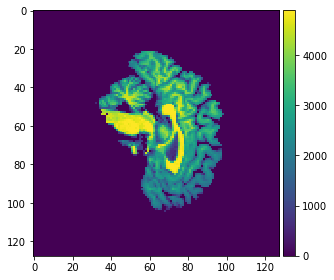

In [108]:
img_in1=nib.load(in1)

img_in1_arr=img_in1.get_fdata()

print("This is the input of fnirit:",'--'*10)
print("This is the shape of the in1 image:",img_in1.shape)
print("This is the shape of ref3 data:",img_in1_arr.shape)
print("This is the shape of the ref3 image's affine matrix:",img_in1.affine.shape)

io.imshow(img_in1_arr[46])

The purpose of overlay_slices are not compare, I just want to show myself the three slice of input image


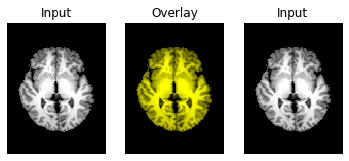

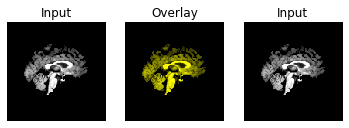

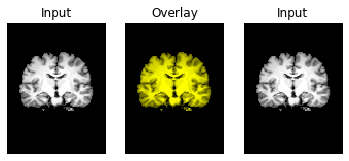

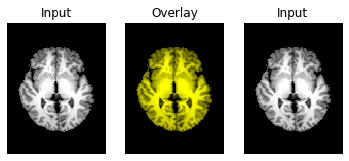

In [122]:
print('The purpose of overlay_slices are not compare, I just want to show myself the three slice of input image')
regtools.overlay_slices(img_in1_arr, img_in1_arr, None, 0,"Input", "Input")
regtools.overlay_slices(img_in1_arr, img_in1_arr, None, 1,"Input", "Input")
regtools.overlay_slices(img_in1_arr, img_in1_arr, None, 2,"Input", "Input")

This is the output of fnirit: --------------------
This is the shape of the iout image: (91, 109, 91)
This is the shape of iout data: (91, 109, 91)
This is the shape of the iout image's affine matrix: (4, 4)


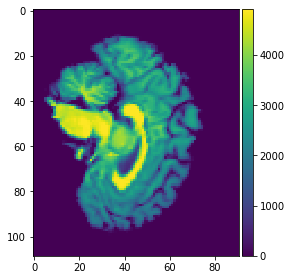

In [110]:
img_iout=nib.load(iout)

img_iout_arr=img_iout.get_fdata()

print("This is the output of fnirit:",'--'*10)
print("This is the shape of the iout image:",img_iout.shape)
print("This is the shape of iout data:",img_iout_arr.shape)
print("This is the shape of the iout image's affine matrix:",img_iout.affine.shape)

io.imshow(img_iout_arr[46])

Compare the output image with the input image to see the registration result


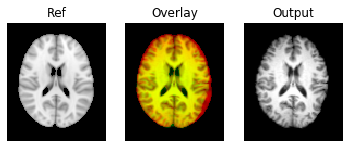

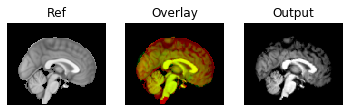

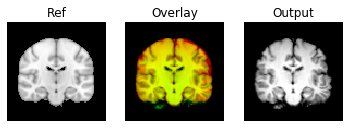

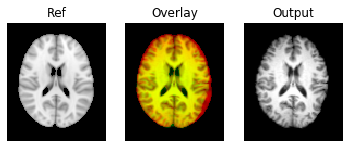

In [123]:
print("Compare the output image with the input image to see the registration result")
regtools.overlay_slices(img_ref1_arr, img_iout_arr, None, 0,"Ref", "Output")
regtools.overlay_slices(img_ref1_arr, img_iout_arr, None, 1,"Ref", "Output")
regtools.overlay_slices(img_ref1_arr, img_iout_arr, None, 2,"Ref", "Output")

This is the cout of fnirt: --------------------
This is the shape of the cout image: (25, 30, 25, 3)
This is the shape of cout data: (25, 30, 25, 3)
This is the shape of the cout image's affine matrix: (4, 4)


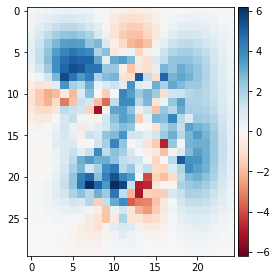

In [129]:
img_cout=nib.load(cout)

img_cout_arr=img_cout.get_fdata()

print("This is the cout of fnirt:",'--'*10)
print("This is the shape of the cout image:",img_cout.shape)
print("This is the shape of cout data:",img_cout_arr.shape)
print("This is the shape of the cout image's affine matrix:",img_cout.affine.shape)

io.imshow(img_cout_arr[13,:,:,2])

In [113]:
print("Notice that the fnirt actually do the nonlinear mapping, which changes the shape of the input data to the reference space")

Notice that the fnirt actually do the nonlinear mapping, which changes the shape of the input data to the reference space


In [114]:
print("The below is applywarp part:")
print('~~'*20)

The below is applywarp part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


This is the ref of applywarp: --------------------
This is the shape of the ref image: (96, 128, 128)
This is the shape of ref data: (96, 128, 128)
This is the shape of the ref image's affine matrix: (4, 4)


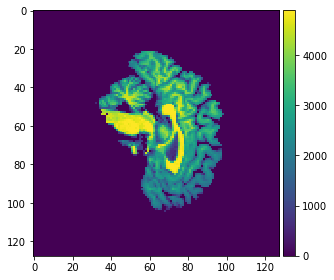

In [115]:
img_ref3=nib.load(ref3)

img_ref3_arr=img_ref3.get_fdata()

print("This is the ref of applywarp:",'--'*10)
print("This is the shape of the ref image:",img_ref3.shape)
print("This is the shape of ref data:",img_ref3_arr.shape)
print("This is the shape of the ref image's affine matrix:",img_ref3.affine.shape)

io.imshow(img_ref3_arr[46])

This is the input of applywarp: --------------------
This is the shape of the in2 image: (91, 109, 91)
This is the shape of in2 data: (91, 109, 91)
This is the shape of the in2 image's affine matrix: (4, 4)


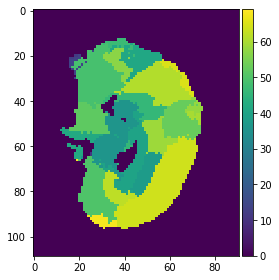

In [116]:
img_in2=nib.load(in2)

img_in2_arr=img_in2.get_fdata()

print("This is the input of applywarp:",'--'*10)
print("This is the shape of the in2 image:",img_in2.shape)
print("This is the shape of in2 data:",img_in2_arr.shape)
print("This is the shape of the in2 image's affine matrix:",img_in2.affine.shape)

io.imshow(img_in2_arr[46])

This is the final output: --------------------
This is the shape of the out2 image: (96, 128, 128)
This is the shape of out2 data: (96, 128, 128)
This is the shape of the out2 image's affine matrix: (4, 4)


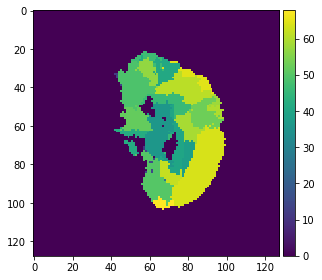

In [117]:
img_out2=nib.load(out2)

img_out2_arr=img_out2.get_fdata()

print("This is the final output:",'--'*10)
print("This is the shape of the out2 image:",img_out2.shape)
print("This is the shape of out2 data:",img_out2_arr.shape)
print("This is the shape of the out2 image's affine matrix:",img_out2.affine.shape)

io.imshow(img_out2_arr[46])

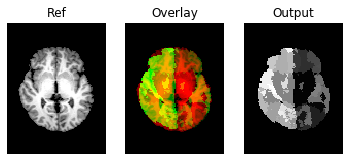

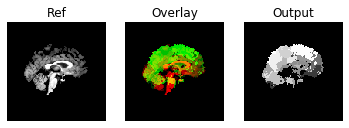

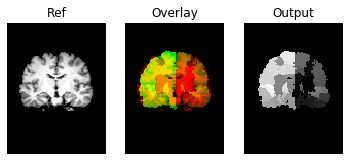

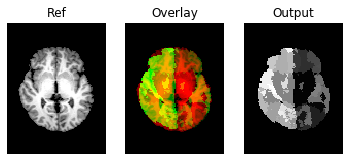

In [118]:
regtools.overlay_slices(img_ref3_arr, img_out2_arr, None, 0,"Ref", "Output")
regtools.overlay_slices(img_ref3_arr, img_out2_arr, None, 1,"Ref", "Output")
regtools.overlay_slices(img_ref3_arr, img_out2_arr, None, 2,"Ref", "Output")

This is the image of the warp: --------------------
This is the shape of the warp2 image: (96, 128, 128, 3)
This is the shape of warp2 data: (96, 128, 128, 3)
This is the shape of the warp2 image's affine matrix: (4, 4)


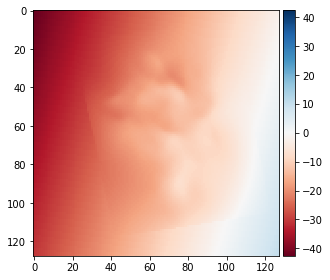

In [119]:
img_warp2=nib.load(warp2)

img_warp2_arr=img_warp2.get_fdata()

print("This is the image of the warp:",'--'*10)
print("This is the shape of the warp2 image:",img_warp2.shape)
print("This is the shape of warp2 data:",img_warp2_arr.shape)
print("This is the shape of the warp2 image's affine matrix:",img_warp2.affine.shape)

io.imshow(img_warp2_arr[46,:,:,1])